In [1]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler, PolynomialFeatures

In [2]:
np.random.seed(42)
X = 6 * np.random.rand(100, 1) - 3
y = 2 + 0.5 * X**2 + X + np.random.randn(100, 1)

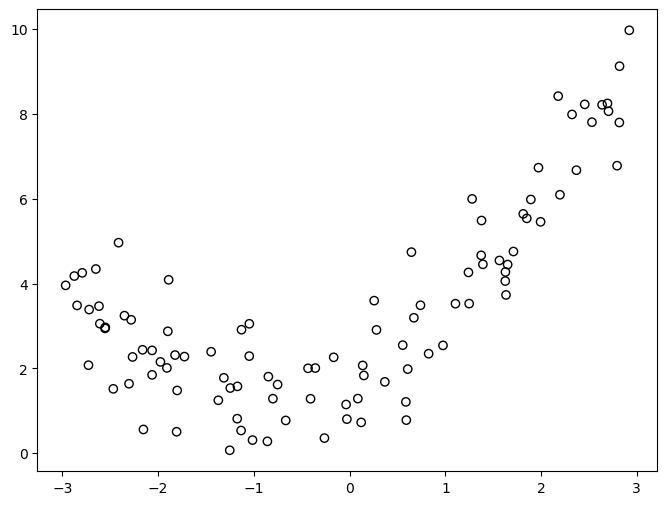

In [3]:
plt.figure(figsize=(8,6))
plt.scatter(X, y, facecolors='none', edgecolors='black');

In [4]:
model = make_pipeline(PolynomialFeatures(degree=2, include_bias=False),
                      LinearRegression(fit_intercept=True))
model.fit(X, y)

Pipeline(steps=[('polynomialfeatures', PolynomialFeatures(include_bias=False)),
                ('linearregression', LinearRegression())])

In [5]:
params = np.concatenate([
    model.named_steps['linearregression'].intercept_,
    model.named_steps['linearregression'].coef_.ravel()
], axis=0)[:, np.newaxis]

In [6]:
params

array([[1.78134581],
       [0.93366893],
       [0.56456263]])

In [7]:
poly_features = model.named_steps['polynomialfeatures'].transform(X)

In [8]:
poly_features[:5, :]

array([[-0.75275929,  0.56664654],
       [ 2.70428584,  7.3131619 ],
       [ 1.39196365,  1.93756281],
       [ 0.59195091,  0.35040587],
       [-2.06388816,  4.25963433]])

In [9]:
poly_features_b = sm.add_constant(poly_features)

In [10]:
poly_features_b[:5, :]

array([[ 1.        , -0.75275929,  0.56664654],
       [ 1.        ,  2.70428584,  7.3131619 ],
       [ 1.        ,  1.39196365,  1.93756281],
       [ 1.        ,  0.59195091,  0.35040587],
       [ 1.        , -2.06388816,  4.25963433]])

In [11]:
poly_features_b.shape

(100, 3)

In [12]:
params.shape

(3, 1)

In [13]:
y_pred_manual = poly_features_b @ params
y_pred_sklearn = model.named_steps['linearregression'].predict(poly_features)

In [16]:
np.allclose(y_pred_manual, y_pred_sklearn)

True

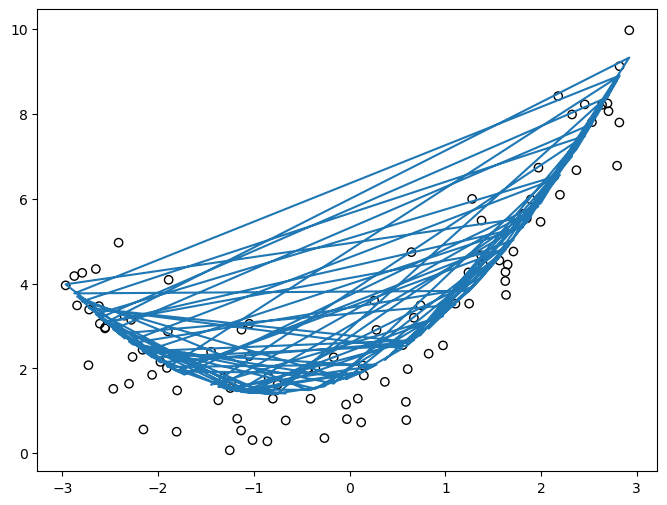

In [26]:
plt.figure(figsize=(8,6))
plt.scatter(X, y, facecolors='none', edgecolors='black');
plt.plot(X, y_pred_manual);

- Notice how the plot is not at all what it is supposed to look like.
- This is because the data points are not sorted.

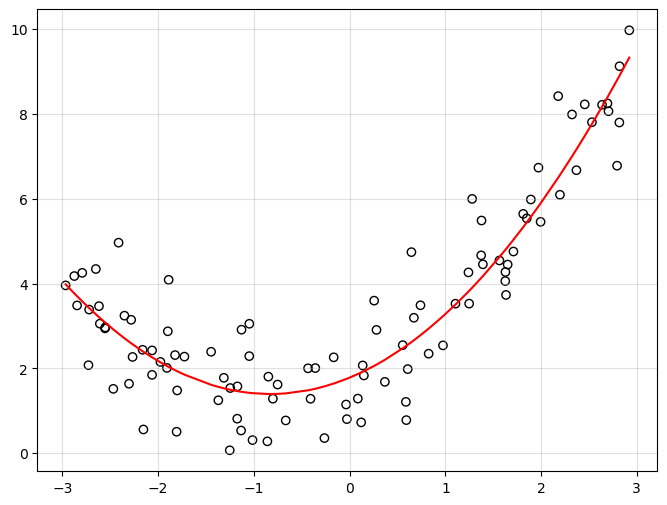

In [49]:
# Sort the data points by the original X
y_pred_sorted = y_pred_manual[np.argsort(X, axis=0).ravel()]

# Sort the original X as well so that they match the predicted values in the plot
X_sorted = np.sort(X, axis=0)

# Plot again
plt.figure(figsize=(8,6))
plt.scatter(X, y, facecolors='none', edgecolors='black');
plt.plot(np.sort(X, axis=0), y_pred_sorted, color='red')
plt.grid(True, alpha=0.4);